<div class="alert alert-success">
    <h1>Assignment 1: Linear Regression</h1>
    <h3 align='center'>Machine Learning Course (4032-01)</h3>
    <h5 align='center'>Instructor: Dr.Mehran Safayani</h5>
    <h5 align='center'>TA: Arash Azhand</h5>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Create Dataset**

In [2]:
# Set random seed for reproducibility
np.random.seed(84)

# Generate 1000 random square feet values (ranging from 500 to 5000)
square_feet = np.random.randint(500, 5000, 1000)

# Define a linear relationship: Price = 150 * Square Feet + Noise
price = 150 * square_feet + np.random.normal(0, 50000, 1000)  # Adding some noise

# Create DataFrame
df = pd.DataFrame({'Square_Feet': square_feet, 'Price': price})

# Display first 5 rows
print(df.head())

# Save to CSV
df.to_csv("house_prices.csv", index=False)


   Square_Feet          Price
0         4325  741452.386180
1         3884  579469.230020
2         3952  645343.443296
3         4802  739800.223797
4         3681  541393.310522


# **Pandas**

## 1. Loading and displaying data

In [3]:
# Load dataset
df = pd.read_csv("house_prices.csv")

# Display first few rows
print(df.head())

# Display basic info about the dataset
print(df.info())

# Show basic statistics
print(df.describe())


   Square_Feet          Price
0         4325  741452.386180
1         3884  579469.230020
2         3952  645343.443296
3         4802  739800.223797
4         3681  541393.310522
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Square_Feet  1000 non-null   int64  
 1   Price        1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB
None
       Square_Feet          Price
count    1000.0000    1000.000000
mean     2779.3720  417609.739384
std      1328.1005  208568.294179
min       503.0000   -2844.368508
25%      1577.7500  231864.422582
50%      2803.5000  423585.806406
75%      3949.7500  592750.049374
max      4999.0000  863030.536808


## 2. Checking for missing values

In [4]:
print(df.isnull().sum())  # Count missing values in each column

Square_Feet    0
Price          0
dtype: int64


Since we generated the dataset ourselves, it shouldn't have missing values. But in real-world datasets, handling missing values is crucial.

## 3. Sorting and filtering data

Sort the dataset by price

In [5]:
df_sorted = df.sort_values(by="Price", ascending=False)
print(df_sorted.head())  # Display most expensive houses


     Square_Feet          Price
893         4989  863030.536808
141         4889  851242.048474
113         4993  837494.833195
205         4775  821429.585100
844         4967  820545.160785


Filter houses with square footage greater than 3000

In [6]:
large_houses = df[df["Square_Feet"] > 3000]
large_houses.head()

,Square_Feet,Price
0,4325,741452.386180
1,3884,579469.230020
2,3952,645343.443296
3,4802,739800.223797
4,3681,541393.310522


Visualize the data using `df.plot` and `kind="scatter"`

## 4. Using `.iloc` for Indexing in Pandas

### 4.1. Selecting Specific Rows

In [7]:
# Select the first 5 rows
print(df.iloc[:5])

# Select the last row
print(df.iloc[-1])


   Square_Feet          Price
0         4325  741452.386180
1         3884  579469.230020
2         3952  645343.443296
3         4802  739800.223797
4         3681  541393.310522
Square_Feet       885.000000
Price          133231.030975
Name: 999, dtype: float64


### 4.2. Selecting Specific Columns

In [8]:
# Select the "Square_Feet" column using iloc
print(df.iloc[:, 0])  # First column (Square_Feet)

# Select the "Price" column
print(df.iloc[:, 1])  # Second column (Price)


0      4325
1      3884
2      3952
3      4802
4      3681
       ... 
995    3420
996    2468
997    4952
998    1439
999     885
Name: Square_Feet, Length: 1000, dtype: int64
0      741452.386180
1      579469.230020
2      645343.443296
3      739800.223797
4      541393.310522
           ...      
995    507599.437427
996    461888.250101
997    768263.042245
998    151040.599291
999    133231.030975
Name: Price, Length: 1000, dtype: float64


### 4.3. Selecting a Range of Rows and Columns

In [9]:
# Select rows from index 10 to 20 and both columns
print(df.iloc[10:20, :])

    Square_Feet          Price
10         4578  724545.082445
11         1233  256045.664831
12          804  142136.369360
13          802  162714.078764
14         3896  592716.198017
15         4024  694229.377073
16         2856  414713.245096
17         4486  668811.369969
18         3958  636999.792545
19         1099  194851.444566


## 5. Plotting with Pandas

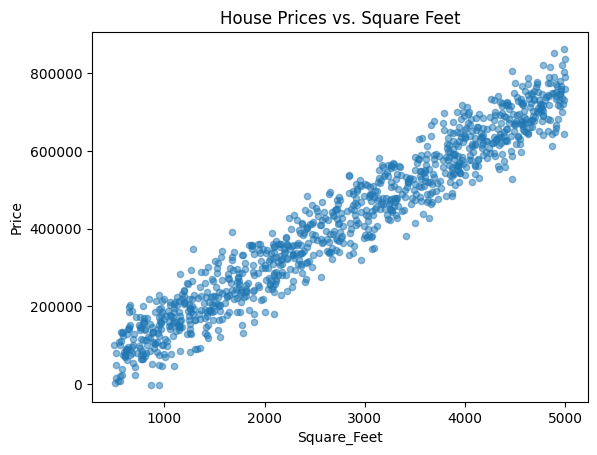

In [10]:
df.plot(kind='scatter', x='Square_Feet', y='Price', alpha=0.5)
plt.title("House Prices vs. Square Feet")
plt.show()


# **Numpy**

## 1. Creating NumPy Arrays


convert Pandas DataFrame columns into NumPy arrays and perform operations.

In [11]:
# Convert pandas columns to NumPy arrays
square_feet_np = df["Square_Feet"].values
price_np = df["Price"].values

# Display first 5 values
print(square_feet_np[:5])
print(price_np[:5])

[4325 3884 3952 4802 3681]
[741452.38617975 579469.23001986 645343.4432958  739800.22379669
 541393.31052222]


## 2. Basic Mathematical Operations

Perform element-wise operations on NumPy arrays.

In [12]:
# Multiply all square feet values by 2
double_sq_feet = square_feet_np * 2
print(double_sq_feet[:5])

# Add a constant to price
price_plus_1000 = price_np + 1000
print(price_plus_1000[:5])


[8650 7768 7904 9604 7362]
[742452.38617975 580469.23001986 646343.4432958  740800.22379669
 542393.31052222]


## 3. Reshaping and Indexing

Reshape *'square_feet_np'* and *'price_np'* to `(1000, 1)`

In [13]:
# Reshape arrays (not necessary for 1D, but useful for ML models)
square_feet_np = square_feet_np.reshape(-1, 1)
price_np = price_np.reshape(-1, 1)

# Accessing specific elements
print(square_feet_np[:5])  # First 5 house's square feet
print(price_np[-6:-1])  # Last 5 house's price

# Display the shape of each one
print(square_feet_np.shape)
print(price_np.shape)

[[4325]
 [3884]
 [3952]
 [4802]
 [3681]]
[[127902.32155049]
 [507599.43742675]
 [461888.25010112]
 [768263.04224501]
 [151040.59929105]]
(1000, 1)
(1000, 1)


## 4. Applying Functions

You should be able to use `np.mean` and `np.std`

In [14]:
# Calculate mean and standard deviation
print("Mean square feet:", np.mean(square_feet_np))
print("Standard deviation of price:", np.std(price_np))

# Normalize the square feet feature (Z-score normalization)
square_feet_norm = (square_feet_np - np.mean(square_feet_np)) / np.std(square_feet_np)
print(square_feet_norm[:5])  # Display first 5 normalized values


Mean square feet: 2779.372
Standard deviation of price: 208463.9839475247
[[1.16437076]
 [0.83215143]
 [0.88337799]
 [1.52371005]
 [0.67922507]]


# **Matplotlib**

## 1. Line plot

Visualize house prices increasing with square footage.

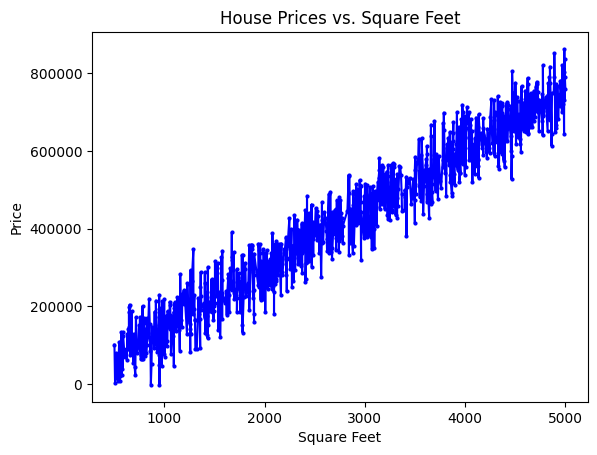

In [15]:
# Sort data for a better-looking line plot
df_sorted = df.sort_values(by="Square_Feet")

# Line plot
plt.plot(df_sorted["Square_Feet"], df_sorted["Price"], color='b', linestyle='-', marker='o', markersize=2)
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("House Prices vs. Square Feet")
plt.show()

## 2. Scatter Plot (Better for Regression Visualization)

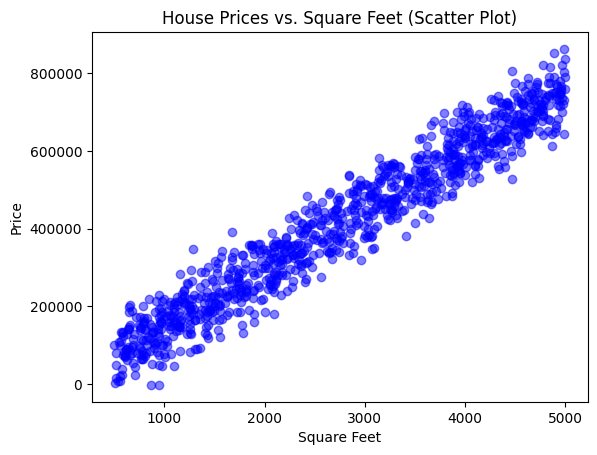

In [16]:
plt.scatter(df["Square_Feet"], df["Price"], alpha=0.5, color='b')
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("House Prices vs. Square Feet (Scatter Plot)")
plt.show()


## 3. Histogram

Let’s see how square footage is distributed.

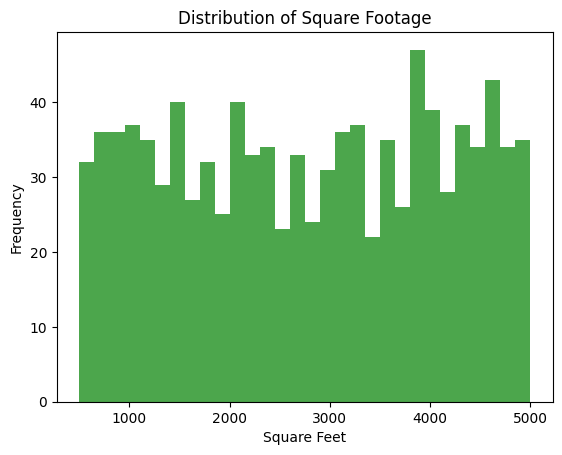

In [17]:
plt.hist(df["Square_Feet"], bins=30, color='g', alpha=0.7)
plt.xlabel("Square Feet")
plt.ylabel("Frequency")
plt.title("Distribution of Square Footage")
plt.show()


## 4. Customizing Plots (Labels, Grid, Legends, Colors, and Styles)

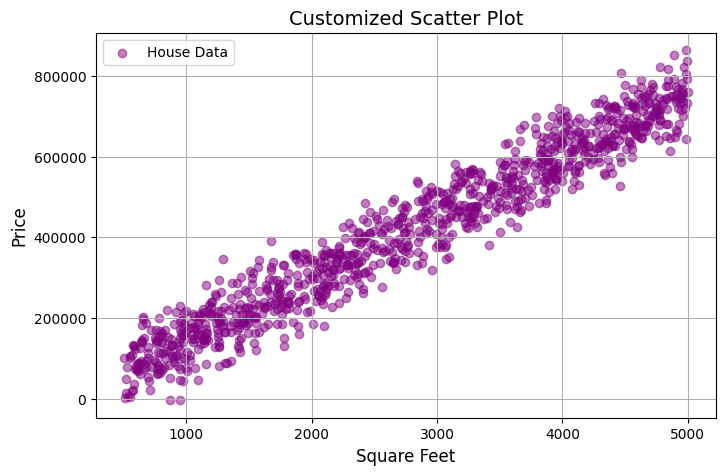

In [18]:
plt.figure(figsize=(8,5))  # Set figure size
plt.scatter(df["Square_Feet"], df["Price"], alpha=0.5, color='purple', label="House Data")
plt.xlabel("Square Feet", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.title("Customized Scatter Plot", fontsize=14)
plt.grid(True)  # Add grid
plt.legend()  # Add legend
plt.show()


# **Applying Linear Regression with Scikit-Learn**

## 1. Splitting the Dataset into Training and Test Sets

split 80% of the data for training and 20% for testing.

In [19]:
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df[["Square_Feet"]].values  # Feature matrix
y = df["Price"].values  # Target variable

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset sizes
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 800
Test set size: 200


## 2. Standardizing the Features

Since house sizes have large values, we normalize them for better model performance.

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data (use same scaling)


## 3. Training the Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Display model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")


Intercept: 417872.84692739364
Coefficient: 200261.96620188747


## 4. Making Predictions

In [22]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Display first 5 predictions
print(y_pred[:5])


[320978.92635325 647115.49634843 590706.79356605 328277.08736013
 489748.89963747]


## 5. Evaluating the Model

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")  # Closer to 1 is better


Mean Squared Error (MSE): 2509977238.49
R² Score: 0.9455


## 6. Visualizing the Regression Line

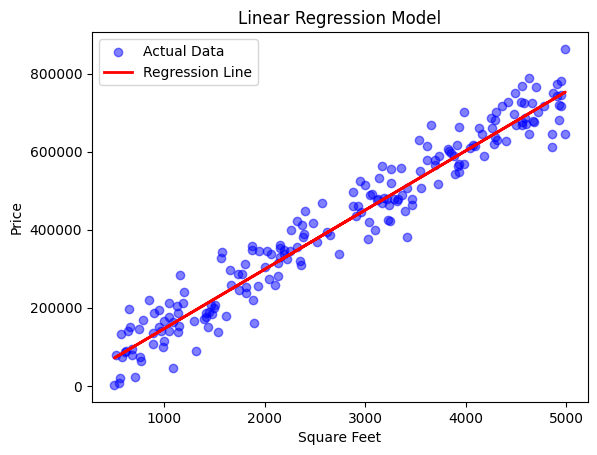

In [24]:
# Scatter plot of actual data
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual Data")

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Square Feet")
plt.ylabel("Price")
plt.title("Linear Regression Model")
plt.legend()
plt.show()
